In [119]:
#Загрузка необходимых библиотек и модулей этих библиотек

import pandas as pd
from pandas import Series
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [120]:
#Загрузка данных
data = pd.read_csv('train.csv')

In [121]:
#Просматриваем датасет
data

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [123]:
data.nunique(dropna=False)

client_id           73799
education               6
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
bki_request_cnt        38
home_address            3
work_address            3
income                966
foreign_passport        2
default                 2
dtype: int64

<Figure size 432x288 with 0 Axes>

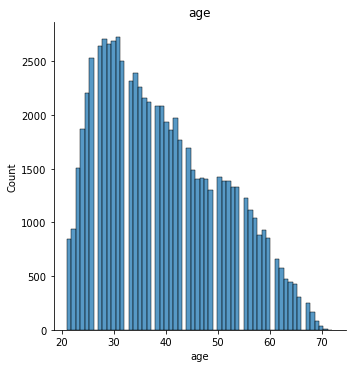

<Figure size 432x288 with 0 Axes>

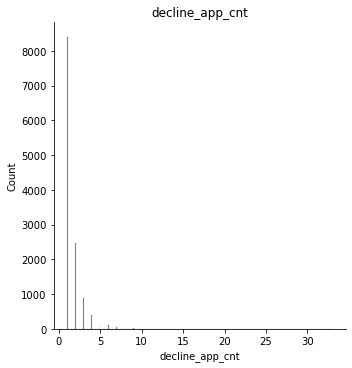

<Figure size 432x288 with 0 Axes>

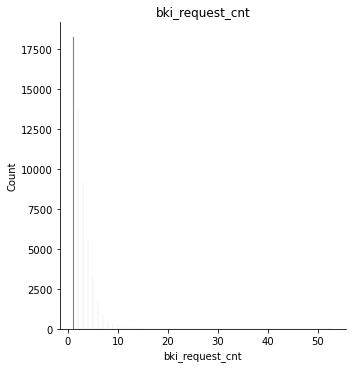

<Figure size 432x288 with 0 Axes>

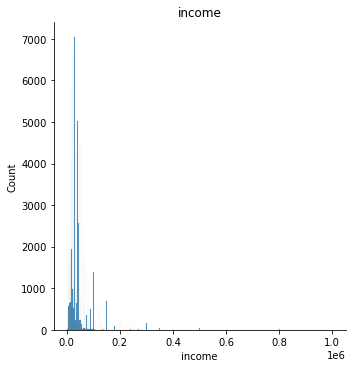

In [124]:
# Создаем списки параметров, разбивая их по типам, для последующей обработки
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

#числовые переменные

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

for i in num_cols:
    plt.figure()
    sns.displot(data[i][data[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

<AxesSubplot:>

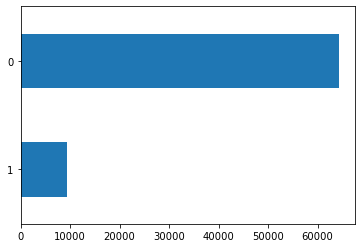

In [125]:
# Визуально оцениваем распределение целевого параметра
data['default'].value_counts(ascending=True).plot(kind='barh')

In [126]:
# Удаляем параметры, которые не несут ценности для модели
data.drop(['client_id'], axis = 1, inplace=True)

In [127]:
# Заподнение пропускоы в ['education'] наиболее частым значением 'SCH'
data['education'].fillna('SCH',inplace=True)

In [128]:
# Логарифмируем числовые переменные
data.age = np.log(data.age+1)
data.decline_app_cnt = np.log(data.decline_app_cnt+1)
data.bki_request_cnt = np.log(data.bki_request_cnt+1)
data.income = np.log(data.income+1)

<AxesSubplot:>

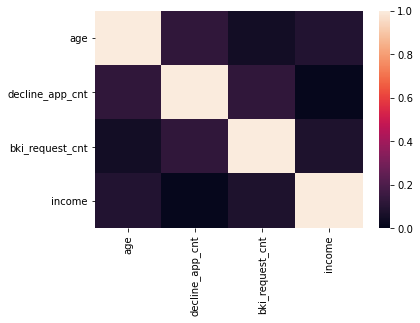

In [129]:
# Просматриваем корреляцию числовых переменных
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

In [130]:
# Для бинарных признаков мы будем использовать LabelEncoder
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(data['sex']))
print(dict(enumerate(label_encoder.classes_)))
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])

{0: 'F', 1: 'M'}


In [131]:
# убедимся в преобразовании    
data.head()

,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,SCH,1,4.143135,1,1,0.000000,0,0.693147,1,2,9.798183,0,0
1,SCH,0,4.094345,0,0,0.000000,0,1.386294,2,3,9.852247,0,0
2,SCH,1,3.258097,1,0,1.098612,0,0.693147,1,2,10.308986,1,0
3,SCH,0,3.988984,0,0,0.000000,0,1.098612,2,3,9.210440,0,0
4,GRD,1,3.891820,0,0,0.000000,1,0.693147,2,3,10.308986,1,0


In [132]:
# Заменяем значения в столбце education на dummie-переменные
data = pd.get_dummies(data, columns=['education'], dummy_na=True)

In [133]:
# Разбиваем данные нa обучающую и тестовую выборку
train_data, test_data = train_test_split(data, test_size=0.33, random_state=42)

y = train_data['default'].values  # наш таргет
X = train_data.drop(['default'], axis=1)

In [134]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
from sklearn.model_selection import train_test_split

# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# проверяем
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39556, 17), (9889, 17), (39556,), (9889,))

In [136]:
# Импортируем необходимые библиотеки:
from sklearn.linear_model import LogisticRegression # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
from sklearn.model_selection import GridSearchCV

In [137]:
# Создаём модель
model = LogisticRegression(random_state=1000).fit(X_train, y_train)

# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

C:\Users\Satin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Satin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

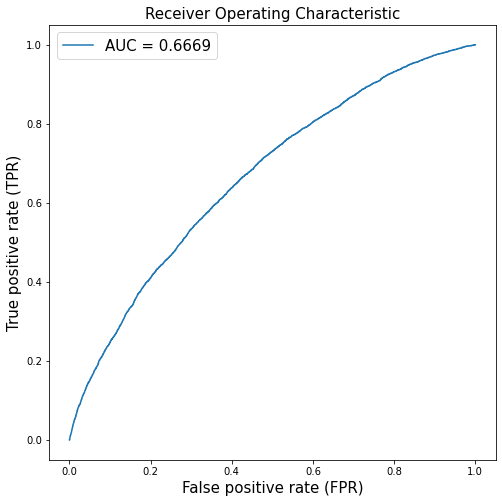

In [138]:
# Отрисовать ROC кривую
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score,confusion_matrix
from matplotlib import pyplot as plt

# Посчитать значения ROC кривой и значение площади под кривой AUC
fpr, tpr, thresholds = roc_curve(y_train,model.predict_proba(X_train).T[1])
roc_auc = roc_auc_score(y_train,model.predict_proba(X_train).T[1])   
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.title('Receiver Operating Characteristic', fontsize=15)
plt.xlabel('False positive rate (FPR)', fontsize=15)
plt.ylabel('True positive rate (TPR)', fontsize=15)
plt.legend(fontsize=15)

In [139]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1276165436343412


In [140]:
# запускаем GridSearch на небольшом кол-ве итераций max_iter=50 и с достаточно большой дельтой останова tol1e-3
# чтобы получить оптимальные параметры модели в первом приближении
model = LogisticRegression()

iter_ = 50
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

## model ваша модель логистической регрессии
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

##печатаем параметры
best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

C:\Users\Satin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.29174349        nan
 0.29146703        nan 0.00588664 0.00588626        nan 0.00588664
 0.0062765  0.00588664 0.00588626        nan 0.00588664 0.0062765
 0.29162145 0.29149616 0.29154577 0.29164465 0.29162145 0.29162145
 0.29149616 0.29154577 0.29142287 0.29162145 0.0062765  0.00588626
 0.0062765  0.0062765  0.0062765  0.00588626 0.0062765  0.0062765
 0.29162151 0.29169692 0.29130091 0.2916738  0.29162151 0.29169692
 0.2911949  0.29160768]
  warnings.warn(


	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 50
	multi_class: 'auto'
	n_jobs: None
	penalty: 'l1'
	random_state: None
	solver: 'liblinear'
	tol: 0.001
	verbose: 0
	warm_start: False


In [141]:
lr_gr = LogisticRegression(**best_parameters)
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

C:\Users\Satin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


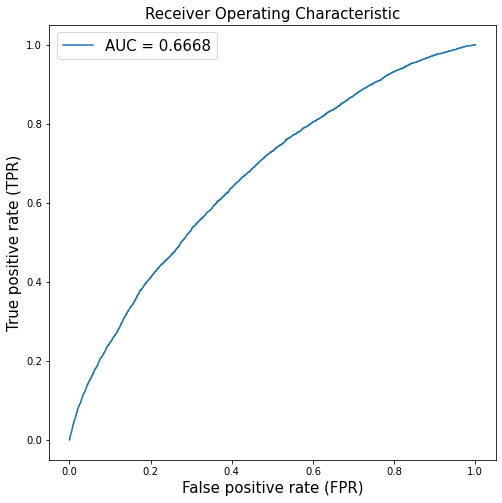

In [142]:
# Отрисовать ROC кривую
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score,confusion_matrix
from matplotlib import pyplot as plt

# Посчитать значения ROC кривой и значение площади под кривой AUC
fpr, tpr, thresholds = roc_curve(y_train,lr_gr.predict_proba(X_train).T[1])
roc_auc = roc_auc_score(y_train,lr_gr.predict_proba(X_train).T[1])   
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.title('Receiver Operating Characteristic', fontsize=15)
plt.xlabel('False positive rate (FPR)', fontsize=15)
plt.ylabel('True positive rate (TPR)', fontsize=15)
plt.legend(fontsize=15)

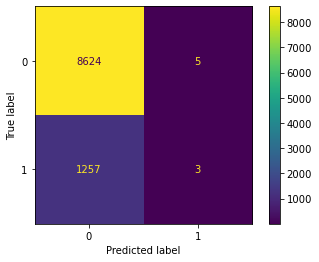

In [148]:
#Построение матрицы ошибок confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()